First we will import the data so that we can load it on to the necessary variables.


In [ ]:
from __future__ import print_function

import os
import sys
import tarfile

import matplotlib.pyplot as plt
import numpy as np
from keras.utils.data_utils import get_file

if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib  # ugly but works
else:
    import urllib

print(sys.version_info)

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = 'stl10_binary'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

def read_labels(path_to_labels):
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order"

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
  
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    plt.imshow(image)
    plt.show()

sys.version_info(major=3, minor=7, micro=11, releaselevel='final', serial=0)


Now we will load the data imported above on the necessary variables.
Below is the function for this puropose.

x_train contains the images expressed as a tensor.
y_train contains the correct labels of the above images. We will use these labels to check and improve our predictions while training.

x_test contains the images as tensors that we will use for testing the trained model and y_test contains the resspective labels.


In [ ]:
from keras.utils.data_utils import get_file

def load_data():
    # download data if needed
    path = get_file(DATA_DIR, origin=DATA_URL, untar=True)

    # test to check if the whole dataset is read correctly
    # path to the binary train file with image data
    train_data_path = os.path.join(path, 'train_X.bin')

    # path to the binary train file with labels
    train_label_path = os.path.join(path, 'train_y.bin')

    # path to the binary test file with image data
    test_data_path = os.path.join(path, 'test_X.bin')

    # path to the binary test file with labels
    test_label_path = os.path.join(path, 'test_y.bin')

    x_train = read_all_images(train_data_path)
    print(x_train.shape)

    y_train = read_labels(train_label_path)
    print(y_train.shape)

    x_test = read_all_images(test_data_path)
    print(x_test.shape)

    y_test = read_labels(test_label_path)
    print(y_test.shape)

    return (x_train, y_train), (x_test, y_test)

Now we will call the above method to extract the data.

In [ ]:
(x_train,y_train), (x_test,y_test) = load_data()
print(type(x_train))

2640412672/2640397119 [==============================] - 87s 0us/step
(5000, 96, 96, 3)
(5000,)
(8000, 96, 96, 3)
(8000,)
<class 'numpy.ndarray'>


We will check the data type of the tensor and the shapes of the generated variables


In [ ]:
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 96, 96, 3)
(5000,)
(8000, 96, 96, 3)
(8000,)


For confirmation that the data has been prcessed the way we want so far, we will print an image and check the label.

dog


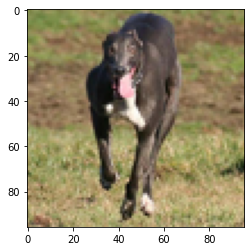

In [ ]:
index=1
x_train[index]
img=plt.imshow(x_train[index])
classify=[ 'airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship','truck']
print(classify[y_train[index]-1])

Use the to categorical method on y_test and y_train to convert it into a matrix.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_one=to_categorical(y_train)
y_test_one=to_categorical(y_test)

print(y_train_one.shape)
print()
print(y_train_one[index])

(5000, 11)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


The next step involves converting all the values in x_train and x_test into decimal values less than ( since the activations are also decimal values less than 1)

In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

print(x_train[index])

[[[0.50588235 0.54901961 0.28627451]
  [0.48627451 0.52156863 0.26666667]
  [0.54117647 0.56470588 0.32941176]
  ...
  [0.54901961 0.54509804 0.32941176]
  [0.54901961 0.54509804 0.31372549]
  [0.56078431 0.54509804 0.32941176]]

 [[0.51764706 0.56078431 0.30980392]
  [0.48627451 0.52156863 0.27843137]
  [0.50196078 0.5372549  0.30588235]
  ...
  [0.56862745 0.54901961 0.35686275]
  [0.56470588 0.55294118 0.3372549 ]
  [0.58823529 0.58039216 0.36862745]]

 [[0.51764706 0.55686275 0.31764706]
  [0.50196078 0.54117647 0.30196078]
  [0.50588235 0.54509804 0.30588235]
  ...
  [0.58823529 0.57647059 0.37254902]
  [0.58039216 0.58039216 0.35686275]
  [0.58431373 0.57647059 0.36078431]]

 ...

 [[0.68627451 0.63529412 0.46666667]
  [0.43921569 0.43137255 0.27058824]
  [0.51764706 0.4627451  0.3372549 ]
  ...
  [0.76862745 0.69411765 0.53333333]
  [0.65098039 0.57254902 0.43137255]
  [0.54117647 0.4745098  0.3254902 ]]

 [[0.58039216 0.49411765 0.34509804]
  [0.45098039 0.42352941 0.30588235]


The next step is the crux of the entire project.
It is the model for the classification of images.
The below is a CNN model with 5 layers.
Below is the logical abstraction of the model which will be implemented when we fit it on the data.


In [ ]:
#Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same',input_shape=(96,96,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))

model.add(Dense(256, activation = 'relu'))

model.add(BatchNormalization())

model.add(Dense(11, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

The below code is for fitting the model on the training data so that the weights of the CNN layers can be adjusted to the most optimum value.

In [ ]:
hist = model.fit(x_train, y_train_one,
                 batch_size = 256,
                 epochs = 30,
                 validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 39s 493ms/step - loss: 1.8170 - accuracy: 0.3587 - val_loss: 3.1453 - val_accuracy: 0.1770
Epoch 2/30
16/16 [==============================] - 4s 269ms/step - loss: 1.2456 - accuracy: 0.5705 - val_loss: 1.7877 - val_accuracy: 0.4190
Epoch 3/30
16/16 [==============================] - 4s 267ms/step - loss: 0.8393 - accuracy: 0.7215 - val_loss: 1.6315 - val_accuracy: 0.4310
Epoch 4/30
16/16 [==============================] - 4s 268ms/step - loss: 0.4745 - accuracy: 0.8640 - val_loss: 1.6614 - val_accuracy: 0.3790
Epoch 5/30
16/16 [==============================] - 4s 267ms/step - loss: 0.2072 - accuracy: 0.9570 - val_loss: 1.7281 - val_accuracy: 0.4040
Epoch 6/30
16/16 [==============================] - 4s 266ms/step - loss: 0.0806 - accuracy: 0.9900 - val_loss: 1.5716 - val_accuracy: 0.4810
Epoch 7/30
16/16 [==============================] - 4s 266ms/step - loss: 0.0343 - accuracy: 0.9983 - val_loss: 1.6175 - val_accuracy: 0.4630
Epoch

The below code is the main challenge of the project.
We will implement the trained model on the test data and check the accuracy with which the model is predicting the values.

In [ ]:
model.evaluate(x_test,y_test_one)

250/250 [==============================] - 4s 14ms/step - loss: 1.6006 - accuracy: 0.5527


[1.600563406944275, 0.5527499914169312]

The below is the plot of the graph indicating how the model is functioning on the training and testing set.


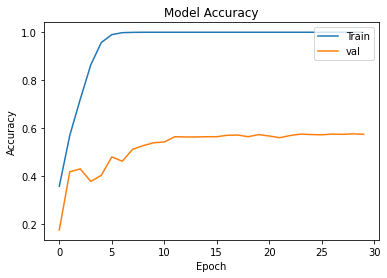

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','val'],loc='upper right')
plt.show()